In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Epicurious Dataset

## Recipes with Nutrition

In [2]:
# Read in json file
df = pd.read_json('../../datasets/EPICURIOUS_llama3_1_vllm_async.jsonl',lines=True)
df.head()

,id,title,cuisines,course,methods,diet_tags_llm,diet_flags,diet_violations,flavors,summary,...,instructions,search_text,search_card_full_md,servings_original,servings_final,macros_per_serving,servings_audit,tag_source_model,tag_timestamp,source_id
0,epi_0,"Lentil, Apple, and Turkey Wrap",[global],main,[boil],[high-protein],"{'vegetarian': False, 'vegan': False, 'pescata...",{'vegetarian': ['4 cups low-sodium vegetable o...,"[earthy, sweet, tangy, herby]",Lentil and apple salad with turkey and lettuce...,...,"1. Place the stock, lentils, celery, carrot, t...","Lentil, Apple, and Turkey Wrap . A global main...","# Lentil, Apple, and Turkey Wrap \n\n*Main, gl...",1,1,"{'cal': 426.0, 'protein_g': 30.0, 'fat_g': 7.0...","{'servings_original': 1.0, 'servings_candidate...",meta-llama/Llama-3.1-8B-Instruct,2025-10-09T08:14:11.502684+00:00Z,epi_0
1,epi_1,Boudin Blanc Terrine with Red Onion Confit,[french],appetizer,"[chill, bake]",[high-protein],"{'vegetarian': False, 'vegan': False, 'pescata...",{'vegetarian': ['1 pound trimmed boneless cent...,"[savory, herby, oniony, meaty]","Boudin blanc terrine with red onion confit, se...",...,Combine first 9 ingredients in heavy medium sa...,Boudin Blanc Terrine with Red Onion Confit . A...,# Boudin Blanc Terrine with Red Onion Confit \...,1,1,"{'cal': 403.0, 'protein_g': 18.0, 'fat_g': 23....","{'servings_original': 1.0, 'servings_candidate...",meta-llama/Llama-3.1-8B-Instruct,2025-10-09T08:14:11.519109+00:00Z,epi_1
2,epi_2,Potato and Fennel Soup Hodge,[global],soup,"[saute, boil]","[dairy-free, gluten-free]","{'vegetarian': False, 'vegan': False, 'pescata...","{'vegetarian': ['2 cups chicken broth'], 'vega...","[earthy, oniony, creamy]",Smooth potato and fennel soup with a hint of o...,...,In a large heavy saucepan cook diced fennel an...,Potato and Fennel Soup Hodge . A global soup (...,"# Potato and Fennel Soup Hodge \n\n*Soup, glob...",1,1,"{'cal': 165.0, 'protein_g': 6.0, 'fat_g': 7.0,...","{'servings_original': 1.0, 'servings_candidate...",meta-llama/Llama-3.1-8B-Instruct,2025-10-09T08:14:11.525468+00:00Z,epi_2
3,epi_4,Spinach Noodle Casserole,[global],main,"[bake, blend]","[dairy-free, gluten-free]","{'vegetarian': True, 'vegan': False, 'pescatar...","{'vegetarian': [], 'vegan': ['1/2 pound extra-...","[herby, creamy, nutmeggy]",Creamy spinach and noodle casserole with pesto...,...,Preheat oven to 350°F. Lightly grease 8x8x2-in...,Spinach Noodle Casserole . A global main (dair...,"# Spinach Noodle Casserole \n\n*Main, global, ...",1,6,"{'cal': 91.16666666666667, 'protein_g': 3.3333...","{'servings_original': 1.0, 'servings_candidate...",meta-llama/Llama-3.1-8B-Instruct,2025-10-09T08:14:11.531306+00:00Z,epi_4
4,epi_5,The Best Blts,[global],None,[],"[dairy-free, gluten-free]","{'vegetarian': False, 'vegan': False, 'pescata...",{'vegetarian': ['12 thick-sliced bacon strips ...,"[herby, creamy, smoky, fresh]",Classic BLT with fresh avocado and basil mayon...,...,"Mix basil, mayonnaise and butter in processor ...","The Best Blts . A global dish (dairy-free, glu...","# The Best Blts \n\n*Dish, global, dairy-free ...",1,6,"{'cal': 158.0, 'protein_g': 3.166666666666666,...","{'servings_original': 1.0, 'servings_candidate...",meta-llama/Llama-3.1-8B-Instruct,2025-10-09T08:14:11.538198+00:00Z,epi_5


In [3]:
# How many rows are there?
print("Dataset contains {} individual recipes (without de-duping)".format(len(df)))

Dataset contains 14588 individual recipes (without de-duping)


In [4]:
# What columns are there?
list(df.columns)

['id',
 'title',
 'cuisines',
 'course',
 'methods',
 'diet_tags_llm',
 'diet_flags',
 'diet_violations',
 'flavors',
 'summary',
 'ingredients_raw',
 'ingredients_norm',
 'servings_avg',
 'servings_min',
 'servings_max',
 'serving_unit',
 'quantities',
 'units',
 'instructions',
 'search_text',
 'search_card_full_md',
 'servings_original',
 'servings_final',
 'macros_per_serving',
 'servings_audit',
 'tag_source_model',
 'tag_timestamp',
 'source_id']

In [5]:
df.iloc[0]["macros_per_serving"]

{'cal': 426.0,
 'protein_g': 30.0,
 'fat_g': 7.0,
 'carbs_g': None,
 'saturates_g': 0.0,
 'sodium_mg': 559.0}

In [6]:
# Let's look at an individual row
recipe = df.iloc[97]
recipe

id                                                               epi_124
title                                   Swiss Chard with Roasted Pepper 
cuisines                                                        [global]
course                                                              side
methods                                                   [grill, steam]
diet_tags_llm                            [low-carb, low-fat, vegetarian]
diet_flags             {'vegetarian': True, 'vegan': True, 'pescatari...
diet_violations        {'vegetarian': [], 'vegan': [], 'pescatarian':...
flavors                                           [smoky, earthy, herby]
summary                Charred peppers and cooked Swiss chard, tossed...
ingredients_raw        [2 1/2 pound Swiss chard, washed well, the coa...
ingredients_norm       [2 12 pound swiss chard washed well the coarse...
servings_avg                                                           1
servings_min                                       

In [7]:
recipe["title"]

'Swiss Chard with Roasted Pepper '

In [9]:
# Each element is a single ingredient with multiple discriptors
recipe["ingredients_raw"]

['2 1/2 pound Swiss chard, washed well, the coarse stems removed and chopped coarse, and the leaves chopped coarse separately',
 '1 red bell pepper, roasted and chopped coarse',
 '2 tablespoons extra-virgin olive oil']

In [10]:
recipe["quantities"]

[]

In [11]:
recipe["units"]

[]

In [12]:
recipe["macros_per_serving"]

{'cal': 123.0,
 'protein_g': 5.0,
 'fat_g': 7.0,
 'carbs_g': None,
 'saturates_g': 0.0,
 'sodium_mg': 605.0}

In [14]:
recipe["instructions"]

'Using a long-handled fork char the peppers over an open flame, turning them, for 2 to 3 minutes, or until the skins are blackened. (Or broil the peppers on the rack of a broiler pan under a preheated broiler about 2 inches from the heat, turning them every 5 minutes, for 15 to 25 minutes, or until the skins are blistered and charred.) Transfer the peppers to a bowl and let them steam, covered, until they are cool enough to handle. Peel them starting at the blossom end, cut off the tops, and discard the seeds and ribs.\nIn a kettle cook the chard stems in about 1/2 cup water, covered, over high heat for 5 minutes, add the chard leaves, and cook the chard, covered, stirring occasionally, for 5 minutes. Drain the chard well and in a bowl toss it with the roasted pepper, the oil, and salt and pepper to taste. Reserve 1 1/2 cups of the chard mixture, covered and chilled,, for making the cod cannelloni.'

In [15]:
print(recipe["search_text"])

Swiss Chard with Roasted Pepper . A global side (low-carb, low-fat, vegetarian). Key ingredients: 2 12 pound swiss chard washed well the coarse stems removed and chopped coarse and the leaves chopped coarse separately, 1 red bell pepper roasted and chopped coarse, 2 tablespoons extravirgin olive oil. Method: grill. Macros/serving: 123 kcal, 5.0g protein, 7.0g fat. Flavor: smoky, earthy, herby. Charred peppers and cooked Swiss chard, tossed with oil and seasonings; simple, flavorful side dish.


In [16]:
print(recipe["search_card_full_md"])

# Swiss Chard with Roasted Pepper 

*Side, global, grill · steam, low-carb · low-fat · vegetarian, smoky · earthy · herby*

Charred peppers and cooked Swiss chard, tossed with oil and seasonings; simple, flavorful side dish.

**Per serving:** 123 kcal · 5.0 g protein · 7.0 g fat

## Ingredients
- 2 1/2 pound Swiss chard, washed well, the coarse stems removed and chopped coarse, and the leaves chopped coarse separately
- 1 red bell pepper, roasted and chopped coarse
- 2 tablespoons extra-virgin olive oil

## Instructions
1. Using a long-handled fork char the peppers over an open flame, turning them, for 2 to 3 minutes, or until the skins are blackened. (Or broil the peppers on the rack of a broiler pan under a preheated broiler about 2 inches from the heat, turning them every 5 minutes, for 15 to 25 minutes, or until the skins are blistered and charred.) Transfer the peppers to a bowl and let them steam, covered, until they are cool enough to handle. Peel them starting at the blossom en

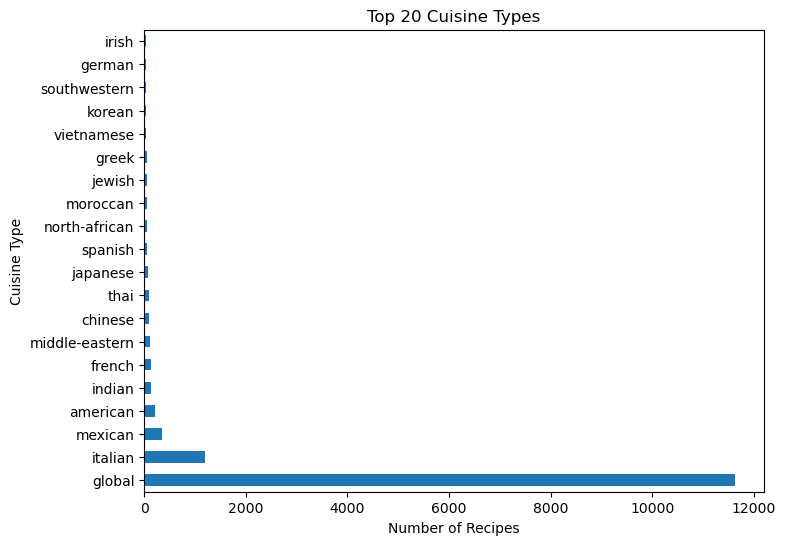

In [17]:
# Show the breakdown by cuisine type
all_cuisines = []
for c in df["cuisines"]:
    if isinstance(c,list):
        all_cuisines.extend(c)
    elif isinstance(c,str):
        all_cuisines.append(c)
all_cuisines = pd.Series(all_cuisines)
all_cuisines.value_counts().head(20).plot(kind='barh',figsize=(8,6))
plt.title("Top 20 Cuisine Types")
plt.xlabel("Number of Recipes")
plt.ylabel("Cuisine Type")
plt.show()

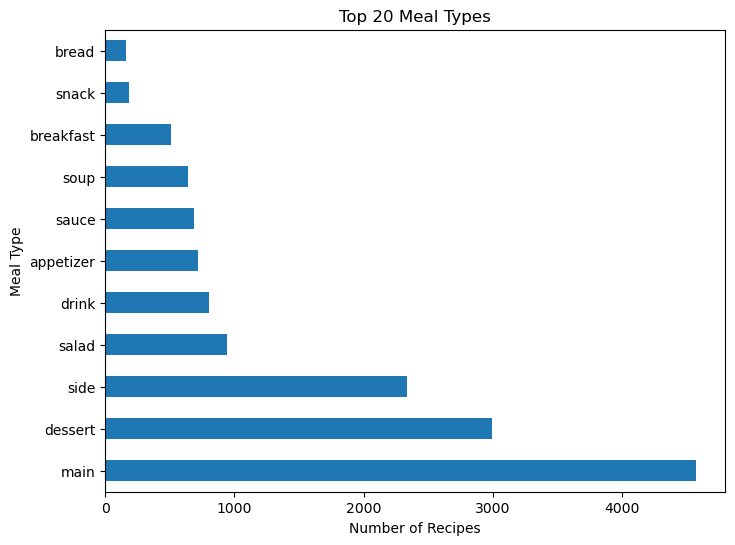

In [18]:
# Show the breakdown by meal type
all_courses = []
for c in df["course"]:
    if isinstance(c,list):
        all_courses.extend(c)
    elif isinstance(c,str):
        all_courses.append(c)
all_courses = pd.Series(all_courses)
all_courses.value_counts().head(20).plot(kind='barh',figsize=(8,6))
plt.title("Top 20 Meal Types")
plt.xlabel("Number of Recipes")
plt.ylabel("Meal Type")
plt.show()

In [19]:
main_courses.iloc[0]["macros_per_serving"]

NameError: name 'main_courses' is not defined

In [20]:
# Show the macro distributions for main courses
main_courses = df[df['course'].apply(lambda x: isinstance(x,list) and 'main' in x or x=='main')]

# filter out some outliers in calories
main_courses = main_courses[main_courses['macros_per_serving'].apply(lambda x: x['cal']<2000)]

print(main_courses.iloc[0]["macros_per_serving"])



{'cal': 426.0, 'protein_g': 30.0, 'fat_g': 7.0, 'carbs_g': None, 'saturates_g': 0.0, 'sodium_mg': 559.0}


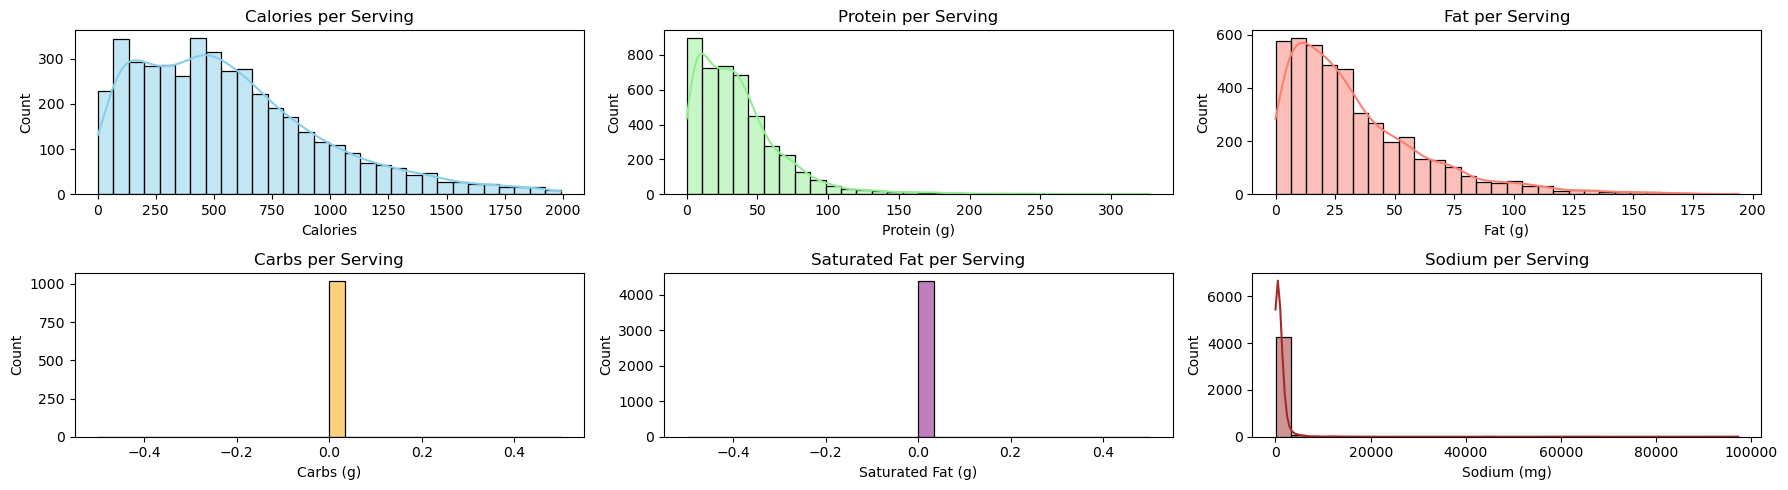

In [21]:
# Create subplots for each distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 5))
sns.histplot(main_courses['macros_per_serving'].apply(lambda x: x['cal']), bins=30, ax=axes[0,0], color='skyblue', kde=True)
axes[0,0].set_title('Calories per Serving')
axes[0,0].set_xlabel('Calories')
sns.histplot(main_courses['macros_per_serving'].apply(lambda x: x['protein_g']), bins=30, ax=axes[0,1], color='lightgreen', kde=True)
axes[0,1].set_title('Protein per Serving')
axes[0,1].set_xlabel('Protein (g)')
sns.histplot(main_courses['macros_per_serving'].apply(lambda x: x['fat_g']), bins=30, ax=axes[0,2], color='salmon', kde=True)
axes[0,2].set_title('Fat per Serving')
axes[0,2].set_xlabel('Fat (g)')
sns.histplot(main_courses['macros_per_serving'].apply(lambda x: x['carbs_g']), bins=30, ax=axes[1,0], color='orange', kde=True)
axes[1,0].set_title('Carbs per Serving')
axes[1,0].set_xlabel('Carbs (g)')
sns.histplot(main_courses['macros_per_serving'].apply(lambda x: x['saturates_g']), bins=30, ax=axes[1,1], color='purple', kde=True)
axes[1,1].set_title('Saturated Fat per Serving')
axes[1,1].set_xlabel('Saturated Fat (g)')
sns.histplot(main_courses['macros_per_serving'].apply(lambda x: x['sodium_mg']), bins=30, ax=axes[1,2], color='brown', kde=True)
axes[1,2].set_title('Sodium per Serving')
axes[1,2].set_xlabel('Sodium (mg)')
plt.tight_layout()
plt.show()

In [195]:
print(main_courses.iloc[287]["search_text"])

Gluten Free/Almost Dairy Free Baked Mac & Cheese. A global main (gluten-free, dairy-free). Key ingredients: rice white longgrain regular unenriched cooked without salt, oil olive salad or cooking, rice flour white unenriched, seeds sesame butter tahini from roasted and toasted kernels most common type, leavening agents yeast bakers active dry, mustard prepared yellow, vinegar balsamic, salt table. Method: bake. Macros/serving: 1165 kcal, 25.3g protein, 37.6g fat, 1.8g carbs. Flavor: creamy, cheesy, nutmeggy, savory. Gluten-free baked macaroni and cheese with a creamy sauce and a blend of cheeses; comforting, slightly healthier take on a classic.


In [196]:
print(main_courses.iloc[287]["search_card_full_md"])

# Gluten Free/Almost Dairy Free Baked Mac & Cheese

*Main, global, bake · boil, gluten-free · dairy-free, creamy · cheesy · nutmeggy · savory*

Gluten-free baked macaroni and cheese with a creamy sauce and a blend of cheeses; comforting, slightly healthier take on a classic.

**Per serving:** 1165 kcal · 25.3 g protein · 37.6 g fat · 1.8 g carbs

## Ingredients
- rice, white, long-grain, regular, unenriched, cooked without salt
- oil, olive, salad or cooking
- rice flour, white, unenriched
- rice flour, white, unenriched
- seeds, sesame butter, tahini, from roasted and toasted kernels (most common type)
- leavening agents, yeast, baker's, active dry
- mustard, prepared, yellow
- vinegar, balsamic
- salt, table
- spices, garlic powder
- spices, onion powder
- spices, pepper, black
- spices, nutmeg, ground
- water, bottled, generic
- sauce, worcestershire
- spices, paprika
- cheese, parmesan, hard
- cheese, mozzarella, low sodium

## Instructions
1. Preheat oven to 350 degrees.
2. Bring 

In [83]:
bread = df[df['course'].apply(lambda x: isinstance(x,list) and 'bread' in x or x=='bread')]
bread.iloc[2]["title"]

'Honey Oatmeal Bread (Abm)'

In [85]:
appetizer = df[df['course'].apply(lambda x: isinstance(x,list) and 'appetizer' in x or x=='appetizer')]
appetizer.iloc[3]["title"]

'Roasted Beet Relish with Apricots'

In [14]:
# figure out if a string can be evaluated as a number
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0

def ingredients_summary(recipe):
    """Summarize the ingredients in a recipe"""
    ingredients = [" ".join((a['text'].split(", "))[::-1]) for a in recipe["ingredients"]]
    quantities = [a['text'] for a in recipe["quantity"]]
    units = [a['text'] for a in recipe["unit"]]
    units = [a if is_number(b) <= 1 else a + "s" for a, b in zip(units, quantities)]
    weights = recipe["weight_per_ingr"]
    nutrients = recipe["nutr_per_ingredient"]

    total_nutrition = {}

    summary = f"Recipe: {recipe['title']}\n"
    
    # Create a summary string
    summary += "\nIngredients:\n"
    for ingr, qty, unit, weight, nutr in zip(ingredients, quantities, units, weights, nutrients):
        summary += "\t-{} {} of {}\n".format(qty, unit, ingr)
        # summary += "\t-{} {} ({} g) of {}\n".format(qty, unit, weight, ingr)

        # Sum the nutritional info (Should be the same fields for every entry)
        for key, value in nutr.items():
            if key not in total_nutrition:
                total_nutrition[key] = 0
            total_nutrition[key] += value

    summary += "\nInstructions:\n"
    instructions = [step['text'] for step in recipe["instructions"]]
    for i, step in enumerate(instructions):
        summary += "\t{}. {}\n".format(i+1, step)
    
    summary += "\nTotal nutritional information for the recipe:\n"
    for key, value in total_nutrition.items():
        summary += "- {}: {:.2f}\n".format(key, value)
    
    return summary

In [15]:
recipe = df.iloc[10278]
print(ingredients_summary(recipe))

Recipe: Stir-Fried Broccoli With Oyster Sauce

Ingredients:
	-2 pounds of raw broccoli
	-6 cups of generic bottled water
	-1/2 cup of dry chicken broth or bouillon soup
	-3 tablespoons of ready-to-serve oyster sauce
	-1 1/2 tablespoon of cooked without salt unenriched regular long-grain white rice
	-1 1/2 teaspoon of cornstarch
	-1 1/2 teaspoon of granulated sugars
	-1 teaspoon of soy sauce made from soy (tamari)
	-1 teaspoon of salad or cooking sesame oil
	-1 1/2 tablespoon of salad or cooking olive oil
	-1/4 cup of raw spring or scallions (includes tops and bulb) onions
	-1 1/2 tablespoon of ground ginger spices
	-2 tablespoons of garlic powder spices

Instructions:
	1. Cut broccoli florets and stems into bite-size pieces to measure 10 cups.Bring water to a boil in a large Dutch oven; add broccoli.
	2. Cook broccoli 4 minutes or until crisp-tender; drain.Combine broth and next 6 ingredients (broth through sesame oil); stir well with a whisk.
	3. Heat the vegetable oil in a large nons

According to [this GitHub page](https://github.com/torralba-lab/im2recipe-Pytorch?utm_source=chatgpt.com), the unabbreviated nutrients and units are the following:
* "fat" = fat (g)
* "pro" = protein (g)
* "sod" = sodium (mg)
* "sat" = saturates (g)
* "sug" = sugar (g)
* "nrg" = energy (kcal)

Let's look at some distributions based on total macros for the recipes. First, we need to add another column that computes the total nutrients for each recipe.

In [16]:
# Calculate the total nutrients for each recipe and add as new columns
def calculate_total_nutrients(nutr_list):
    total_nutrition = {}
    for nutr in nutr_list:
        for key, value in nutr.items():
            if key not in total_nutrition:
                total_nutrition[key] = 0
            total_nutrition[key] += value
    return total_nutrition

# Apply the function to each row in the dataframe and add individual columns for each nutrient
nutrient_totals = df['nutr_per_ingredient'].apply(calculate_total_nutrients)
nutrient_df = pd.json_normalize(nutrient_totals)
nutrient_df.columns = ['total_' + col for col in nutrient_df.columns]
df = pd.concat([df, nutrient_df], axis=1)
df.head()

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,url,weight_per_ingr,total_fat,total_nrg,total_pro,total_sat,total_sod,total_sug
0,"{'fat': 'green', 'salt': 'green', 'saturates':...",000095fc1d,"[{'text': 'yogurt, greek, plain, nonfat'}, {'t...",[{'text': 'Layer all ingredients in a serving ...,"[{'fat': 0.8845044000000001, 'nrg': 133.80964,...","{'energy': 81.12946131894766, 'fat': 2.1401392...",train,"[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]",Yogurt Parfaits,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",http://tastykitchen.com/recipes/breakfastbrunc...,"[226.796, 152.0, 30.5]",8.759504,332.059640,28.300512,1.495351,91.646560,20.818190
1,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",00051d5b9d,"[{'text': 'sugars, granulated'}, {'text': 'oil...",[{'text': 'Cream sugar and butter together til...,"[{'fat': 0.0, 'nrg': 384.0, 'pro': 0.0, 'sat':...","{'energy': 477.09640393594606, 'fat': 23.41248...",val,"[{'text': '1/2'}, {'text': '3/4'}, {'text': '1...","Salt Free, Low Cholesterol Sugar Cookies Recipe","[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://cookeatshare.com/recipes/salt-free-low-...,"[100.80000000000001, 168.0, 21.25, 5.166666666...",175.080521,3567.766667,57.024063,25.612837,1641.052083,106.924948
2,"{'fat': 'orange', 'salt': 'orange', 'saturates...",00059b093b,"[{'text': 'chicken, broilers or fryers, wing, ...","[{'text': 'Preheat oven to 400 degrees F.'}, {...","[{'fat': 174.859716, 'nrg': 2599.0821599999995...","{'energy': 208.05898280960727, 'fat': 14.29704...",train,"[{'text': '3'}, {'text': '1'}, {'text': '1/2'}...",Honey Sriracha Chicken Wings,"[{'text': 'pound'}, {'text': 'teaspoon'}, {'te...",http://tastykitchen.com/recipes/main-courses/h...,"[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",225.808883,3286.102993,242.967747,71.637057,6721.426840,48.155417
3,"{'fat': 'orange', 'salt': 'orange', 'saturates...",0005fc89f7,"[{'text': 'crustaceans, shrimp, raw (not previ...","[{'text': 'In a large bowl, toss the shrimp, g...","[{'fat': 4.6266384, 'nrg': 771.1064, 'pro': 18...","{'energy': 194.7525956849092, 'fat': 15.980767...",train,"[{'text': '2'}, {'text': '3/4'}, {'text': '1 1...",Shrimp and Caper Salad,"[{'text': 'pound'}, {'text': 'cup'}, {'text': ...",http://allrecipes.com/recipe/shrimp-and-caper-...,"[907.184, 75.0, 151.5, 25.799999999999997, 134...",251.606300,3066.247025,188.092448,37.262136,3872.116668,4.952891
4,"{'fat': 'orange', 'salt': 'green', 'saturates'...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 141.35999999999999, 'nrg': 2352.0, 'p...","{'energy': 303.43539955190437, 'fat': 5.094846...",train,"[{'text': '12'}, {'text': '12'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://www.food.com/recipe/natural-peanut-butt...,"[1032.0, 4068.0, 256.0]",272.880000,16252.000000,271.440000,109.712000,424.000000,3385.560000


Plot the distributions by macros

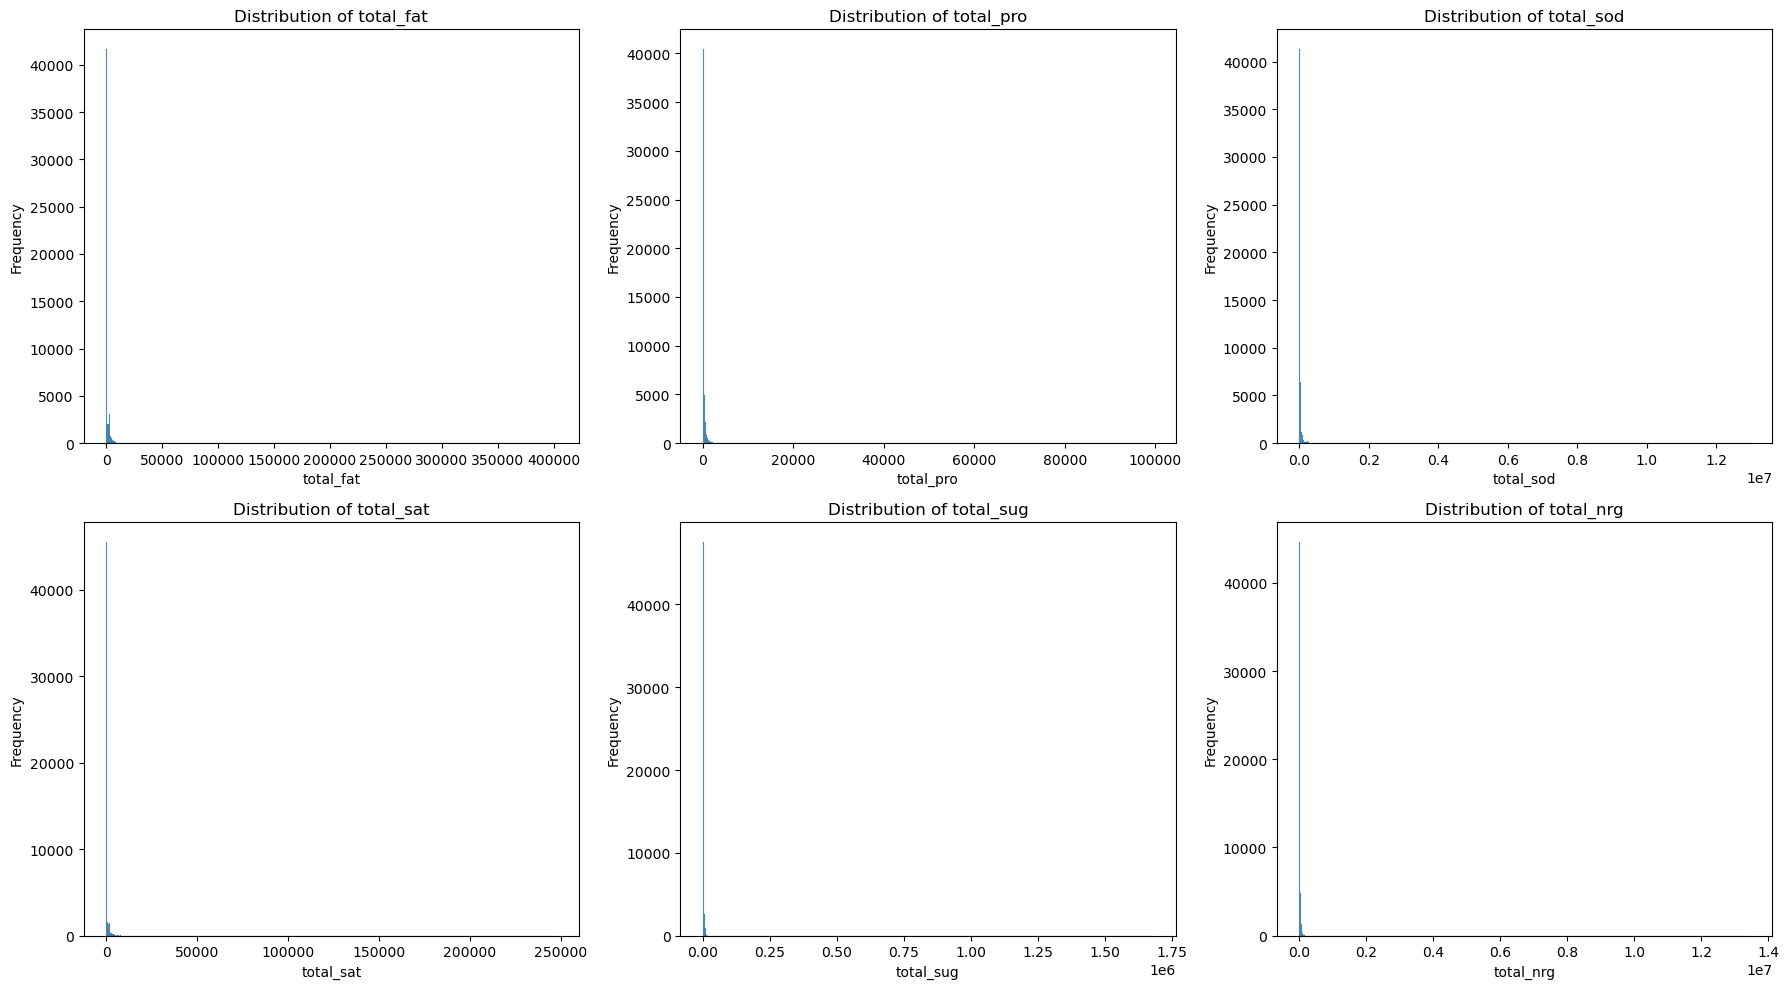

In [17]:
# Plot the distribution of nutrient categories
# Place sensible limits on each nutrient to filter out extreme or incorrect values


nutrient_columns = ['total_fat', 'total_pro', 'total_sod', 'total_sat', 'total_sug', 'total_nrg']

# Create subplots for each nutrient
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(nutrient_columns):
    # Filter out any outliers for better visualization
    filtered_data = df[df[col] < df[col].quantile(0.99)]

    sns.histplot(df[col], bins=500, ax=axes[i])# kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

We are missing the number of servings in the recipes!! We need this in order to determine how much food will be made and calculate the nutrients per meal/food item. We could try to get this 2 ways: first parse the instructions to see if it includes "yield" or "servings". The second would be to use the URL and parse the actual HTML at the site to determine the number of servings. 

In [18]:
import re
import unicodedata

# Common labels that *declare* a yield
YIELD_LABELS = [
    r"\bserves?\b", r"\bservings?\b", r"\byield[s]?\b",
    r"\bmakes?\b", r"\bmakes\s+about\b", r"\bmakes\s+approximately\b",
    r"\benough\s+for\b", r"\bfor\b\s+\d+(?:\s*(?:to|-|–|—)\s*\d+)?\s+(?:people|persons|servings?)\b"
]

# Item-like units we may want to preserve as unit
ITEM_UNITS = [
    "cookies","muffins","cupcakes","bars","brownies","biscuits","scones","pancakes",
    "waffles","tacos","burgers","meatballs","sandwiches","wraps","slices","loaves",
    "dumplings","meals","servings","portion","portions"
]

WORD2NUM = {
    "one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10,
    "eleven":11,"twelve":12,"dozen":12,"a dozen":12
}

# Normalize unicode fractions like ½ ¼ ¾ → "1/2" "1/4" "3/4"
UNICODE_FRACTIONS = {
    "¼":"1/4","½":"1/2","¾":"3/4","⅐":"1/7","⅑":"1/9","⅒":"1/10","⅓":"1/3","⅔":"2/3",
    "⅕":"1/5","⅖":"2/5","⅗":"3/5","⅘":"4/5","⅙":"1/6","⅚":"5/6","⅛":"1/8","⅜":"3/8","⅝":"5/8","⅞":"7/8"
}

def _normalize_unicode_fractions(text: str) -> str:
    for k, v in UNICODE_FRACTIONS.items():
        text = text.replace(k, v)
    return unicodedata.normalize("NFKC", text)

def _wordish_to_number(s: str):
    s = s.strip().lower()
    return WORD2NUM.get(s)

def _parse_num_or_range(text: str):
    """
    Returns (min, max) from a phrase:
    - "4-6", "4 – 6", "4 to 6" → (4,6)
    - "4" → (4,4)
    - "a dozen"/"dozen"/"four" → (n,n)
    """
    t = text.lower()
    # range: 4-6 / 4 – 6 / 4 to 6
    m = re.search(r"\b(\d+)\s*(?:-|–|—|\s+to\s+)\s*(\d+)\b", t)
    if m:
        a, b = int(m.group(1)), int(m.group(2))
        return min(a,b), max(a,b)
    # single integer
    m = re.search(r"\b(\d+)\b", t)
    if m:
        n = int(m.group(1))
        return n, n
    # word numbers like "four", "dozen", "a dozen"
    for w in sorted(WORD2NUM.keys(), key=len, reverse=True):
        if re.search(rf"\b{re.escape(w)}\b", t):
            n = WORD2NUM[w]
            return n, n
    return None, None

def _infer_unit(phrase: str):
    p = phrase.lower()
    for u in ITEM_UNITS:
        if re.search(rf"\b{re.escape(u)}\b", p):
            # normalize plural → plural unit, except 'servings'→'servings'
            return "servings" if u in ("servings","portion","portions","meals") else u
    # If the phrase contains 'serving' or 'servings', prefer that
    if re.search(r"\bservings?\b", p):
        return "servings"
    return "servings"

def _looks_like_yield_sentence(s: str) -> bool:
    # Must contain one of the labels, but exclude imperative "serve" lines
    if re.search(r"\bserve\b", s.lower()) and not re.search(r"\bserves?\b|\bservings?\b", s.lower()):
        return False
    for lab in YIELD_LABELS:
        if re.search(lab, s, flags=re.IGNORECASE):
            return True
    return False

def parse_servings_from_instructions(instructions):
    """
    instructions: list[str] or single string
    Returns dict with found flag and normalized fields.
    """
    if isinstance(instructions, str):
        steps = [instructions]
    else:
        steps = [s for s in instructions if isinstance(s, str)]

    # Narrow search window to reduce false positives
    head = steps[:3] + steps[-2:] if len(steps) > 5 else steps

    candidates = []
    for s in head:
        if not s: 
            continue
        s_norm = _normalize_unicode_fractions(s)
        if _looks_like_yield_sentence(s_norm):
            candidates.append(s_norm)

    # Also inspect standalone short lines (common pattern for "Serves 4.")
    for s in head:
        s_norm = _normalize_unicode_fractions(s)
        for line in s_norm.splitlines():
            line = line.strip()
            if 4 <= len(line) <= 80 and _looks_like_yield_sentence(line):
                candidates.append(line)

    if not candidates:
        return {"found": False, "method_used": "instructions", "confidence": 0.0}

    # Rank candidates: prefer lines with explicit labels and a number/range
    def score(phrase: str) -> float:
        sc = 0.0
        if re.search(r"\bserves?\b|\bservings?\b", phrase, re.I): sc += 1.0
        if re.search(r"\byield[s]?\b|\bmakes?\b", phrase, re.I): sc += 0.8
        if re.search(r"\benough\s+for\b|\bfor\b\s+\d+", phrase, re.I): sc += 0.6
        if re.search(r"\d+\s*(?:-|–|—|\s+to\s+)\s*\d+", phrase): sc += 0.6  # has range
        if re.search(r"\b\d+\b", phrase): sc += 0.4                    # has number
        return sc

    best = max(candidates, key=score)
    unit = _infer_unit(best)
    mn, mx = _parse_num_or_range(best)

    # If we saw a label but no number (rare: "Serves a crowd"), return text only
    if mn is None and mx is None:
        return {
            "found": True,
            "yield_text": best.strip(),
            "servings_min": None,
            "servings_max": None,
            "unit": unit,
            "confidence": 0.5,
            "method_used": "instructions"
        }

    # Confidence heuristic
    conf = 0.8
    if unit != "servings": conf -= 0.1  # items are trickier to interpret
    if mn != mx: conf += 0.05           # explicit range is a good signal

    return {
        "found": True,
        "yield_text": best.strip(),
        "servings_min": mn,
        "servings_max": mx,
        "unit": unit,
        "confidence": max(0.0, min(1.0, conf)),
        "method_used": "instructions"
    }

In [19]:
# Loop through all recipes and parse servings from instructions
servings_info = df['instructions'].apply(parse_servings_from_instructions)
servings_df = pd.json_normalize(servings_info)
df_servings_instr = pd.concat([df, servings_df], axis=1)
df_servings_instr.head()

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,...,weight_per_ingr,total_fat,total_nrg,total_pro,total_sat,total_sod,total_sug,found,method_used,confidence
0,"{'fat': 'green', 'salt': 'green', 'saturates':...",000095fc1d,"[{'text': 'yogurt, greek, plain, nonfat'}, {'t...",[{'text': 'Layer all ingredients in a serving ...,"[{'fat': 0.8845044000000001, 'nrg': 133.80964,...","{'energy': 81.12946131894766, 'fat': 2.1401392...",train,"[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]",Yogurt Parfaits,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",...,"[226.796, 152.0, 30.5]",8.759504,332.059640,28.300512,1.495351,91.646560,20.818190,False,instructions,0.0
1,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",00051d5b9d,"[{'text': 'sugars, granulated'}, {'text': 'oil...",[{'text': 'Cream sugar and butter together til...,"[{'fat': 0.0, 'nrg': 384.0, 'pro': 0.0, 'sat':...","{'energy': 477.09640393594606, 'fat': 23.41248...",val,"[{'text': '1/2'}, {'text': '3/4'}, {'text': '1...","Salt Free, Low Cholesterol Sugar Cookies Recipe","[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,"[100.80000000000001, 168.0, 21.25, 5.166666666...",175.080521,3567.766667,57.024063,25.612837,1641.052083,106.924948,False,instructions,0.0
2,"{'fat': 'orange', 'salt': 'orange', 'saturates...",00059b093b,"[{'text': 'chicken, broilers or fryers, wing, ...","[{'text': 'Preheat oven to 400 degrees F.'}, {...","[{'fat': 174.859716, 'nrg': 2599.0821599999995...","{'energy': 208.05898280960727, 'fat': 14.29704...",train,"[{'text': '3'}, {'text': '1'}, {'text': '1/2'}...",Honey Sriracha Chicken Wings,"[{'text': 'pound'}, {'text': 'teaspoon'}, {'te...",...,"[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",225.808883,3286.102993,242.967747,71.637057,6721.426840,48.155417,False,instructions,0.0
3,"{'fat': 'orange', 'salt': 'orange', 'saturates...",0005fc89f7,"[{'text': 'crustaceans, shrimp, raw (not previ...","[{'text': 'In a large bowl, toss the shrimp, g...","[{'fat': 4.6266384, 'nrg': 771.1064, 'pro': 18...","{'energy': 194.7525956849092, 'fat': 15.980767...",train,"[{'text': '2'}, {'text': '3/4'}, {'text': '1 1...",Shrimp and Caper Salad,"[{'text': 'pound'}, {'text': 'cup'}, {'text': ...",...,"[907.184, 75.0, 151.5, 25.799999999999997, 134...",251.606300,3066.247025,188.092448,37.262136,3872.116668,4.952891,False,instructions,0.0
4,"{'fat': 'orange', 'salt': 'green', 'saturates'...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 141.35999999999999, 'nrg': 2352.0, 'p...","{'energy': 303.43539955190437, 'fat': 5.094846...",train,"[{'text': '12'}, {'text': '12'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,"[1032.0, 4068.0, 256.0]",272.880000,16252.000000,271.440000,109.712000,424.000000,3385.560000,False,instructions,0.0


In [20]:
df_servings_instr["found"].value_counts()

found
False    51235
Name: count, dtype: int64

That found absolutely nothing. Let's make sure this actually works.

In [21]:
my_instructions = "Testing blah blah\n blah Serves 4 to 6 people blah blah\n 1. \n 2. \n 3."
parse_servings_from_instructions(my_instructions)

{'found': True,
 'yield_text': 'Testing blah blah\n blah Serves 4 to 6 people blah blah\n 1. \n 2. \n 3.',
 'servings_min': 4,
 'servings_max': 6,
 'unit': 'servings',
 'confidence': 0.8500000000000001,
 'method_used': 'instructions'}

## URL Servings Parser

If we do this for all recipes one at a time it will take several days to run. Let's work out how to do this asynchronously.


In [22]:
import asyncio, json, random, re, unicodedata
from collections import defaultdict
from contextlib import asynccontextmanager
from urllib.parse import urlparse
from pathlib import Path
from typing import Iterable, List, Dict, Any, Optional

import aiohttp
from aiohttp import ClientSession, ClientTimeout, TCPConnector
from aiolimiter import AsyncLimiter
from bs4 import BeautifulSoup
import extruct
from w3lib.html import get_base_url
from tqdm.auto import tqdm


In [23]:
# --- yield parsing helpers ---

YIELD_ITEM_UNITS = [
    "cookies","muffins","cupcakes","bars","brownies","biscuits","scones",
    "pancakes","waffles","tacos","burgers","meatballs","sandwiches","wraps",
    "slices","loaves","dumplings","meals","servings","portion","portions"
]
WORD2NUM = {"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10,
            "eleven":11,"twelve":12,"dozen":12,"a dozen":12}

def infer_unit(phrase: str) -> str:
    p = phrase.lower()
    for u in YIELD_ITEM_UNITS:
        if re.search(rf"\b{re.escape(u)}\b", p):
            return "servings" if u in ("servings","portion","portions","meals") else u
    if re.search(r"\bservings?\b", p): return "servings"
    return "servings"

def parse_num_or_range(text: str):
    t = text.lower()
    m = re.search(r"\b(\d+)\s*(?:-|–|—|\s+to\s+)\s*(\d+)\b", t)
    if m:
        a, b = int(m.group(1)), int(m.group(2))
        return min(a,b), max(a,b)
    m = re.search(r"\b(\d+)\b", t)
    if m:
        n = int(m.group(1)); return n, n
    for w, n in WORD2NUM.items():
        if re.search(rf"\b{re.escape(w)}\b", t): return n, n
    return None, None

def normalize_yield(yield_text: str, method: str, url: str, status: int, conf: float, rec_id):
    mn, mx = parse_num_or_range(yield_text or "")
    unit = infer_unit(yield_text or "")
    return {
        "id": rec_id,
        "url": url,
        "found": True,
        "yield_text": (yield_text or "").strip(),
        "servings_min": mn,
        "servings_max": mx,
        "unit": unit,
        "confidence": max(0.0, min(1.0, conf)),
        "method_used": method,
        "status": status,
        "error": None,
    }


def extract_jsonld_yield(html: str, url: str) -> Optional[str]:
    data = extruct.extract(
        html,
        base_url=get_base_url(html, url),
        syntaxes=['json-ld','microdata','rdfa','opengraph']
    )
    # JSON-LD
    for block in data.get('json-ld', []):
        try:
            if isinstance(block, list): candidates = block
            elif '@graph' in block: candidates = block['@graph']
            else: candidates = [block]
            for obj in candidates:
                types = obj.get('@type', [])
                if isinstance(types, str): types = [types]
                if any(str(t).lower() == 'recipe' for t in types):
                    ry = obj.get('recipeYield')
                    if ry: return str(ry)
        except Exception:
            pass
    # Microdata/RDFa
    for md in data.get('microdata', []):
        types = md.get('type', [])
        if isinstance(types, str): types = [types]
        if any('schema.org/Recipe' in t for t in types):
            props = md.get('properties', {}) or {}
            ry = props.get('recipeYield')
            if ry:
                return str(ry if not isinstance(ry, list) else ry[0])
    return None

SERVING_LABELS = [
    r"\bserves?\b", r"\bservings?\b", r"\byield[s]?\b",
    r"\bmakes?\b", r"\bmakes\s+about\b", r"\bmakes\s+approximately\b",
    r"\benough\s+for\b", r"\bfor\b\s+\d+(?:\s*(?:to|-|–|—)\s*\d+)?\s+(?:people|persons|servings?)\b"
]
SERVING_PAT = re.compile(
    rf"(?i)(?:{'|'.join(SERVING_LABELS)})[^\.:\n]*?(\d+(?:\s*[-–—]\s*\d+)?|\d+\s*to\s*\d+|\b[aA]?\s*dozen\b|\bone\b|\btwo\b|\bthree\b|\bfour\b|\bfive\b)"
)

def heuristic_yield(html: str) -> Optional[str]:
    soup = BeautifulSoup(html, 'lxml')
    # quick passes in likely places
    for sel in ['meta[name="servings"]','meta[itemprop="recipeYield"]','span','li','p','div','dt','dd','strong','b','h1','h2','h3','h4']:
        for el in soup.select(sel):
            text = el.get('content') if sel.startswith('meta') else (el.get_text(" ", strip=True) if hasattr(el, 'get_text') else None)
            if not text: continue
            m = SERVING_PAT.search(text)
            if m:
                start = max(0, m.start()-25); end = min(len(text), m.end()+25)
                return text[start:end]
    return None


In [24]:
class HostGate:
    """Per-host concurrency + rate limit."""
    def __init__(self, max_concurrent=3, rate_per_sec=1.0):
        self.sem = asyncio.Semaphore(max_concurrent)
        self.limiter = AsyncLimiter(max_rate=rate_per_sec, time_period=1.0)

    @asynccontextmanager
    async def slot(self):
        async with self.sem:
            async with self.limiter:
                yield

def jittered_backoff(attempt: int, base: float = 0.75, cap: float = 10.0) -> float:
    delay = min(cap, base * (2 ** (attempt - 1)))
    return delay * (0.7 + 0.6 * random.random())  # 0.7x–1.3x jitter

async def fetch_and_parse(item, session: ClientSession, gate: HostGate, timeout_s: int = 12, retries: int = 2):
    # item can be {"id": ..., "url": ...} or a (id, url) tuple
    if isinstance(item, dict):
        rec_id, url = item.get("id"), item.get("url")
    else:
        rec_id, url = item  # assume (id, url)

    host = urlparse(url).netloc or "unknown"
    for attempt in range(1, retries + 2):
        try:
            async with gate.slot():
                async with session.get(url, timeout=timeout_s, allow_redirects=True) as resp:
                    status = resp.status
                    if status >= 400:
                        return {"id": rec_id, "url": url, "found": False, "status": status,
                                "method_used": None, "confidence": 0.0, "yield_text": None,
                                "servings_min": None, "servings_max": None, "unit": None, "error": None}
                    html = await resp.text(errors="ignore")
                    ry = extract_jsonld_yield(html, url)
                    if ry:
                        return normalize_yield(ry, "jsonld/microdata", url, status, 0.95, rec_id)
                    hy = heuristic_yield(html)
                    if hy:
                        return normalize_yield(hy, "heuristic", url, status, 0.6, rec_id)
                    return {"id": rec_id, "url": url, "found": False, "status": status,
                            "method_used": None, "confidence": 0.0, "yield_text": None,
                            "servings_min": None, "servings_max": None, "unit": None, "error": None}
        except (aiohttp.ClientConnectionError, aiohttp.ClientPayloadError, asyncio.TimeoutError) as e:
            if attempt <= retries:
                await asyncio.sleep(jittered_backoff(attempt))
                continue
            return {"id": rec_id, "url": url, "found": False, "status": None,
                    "method_used": None, "confidence": 0.0, "yield_text": None,
                    "servings_min": None, "servings_max": None, "unit": None, "error": repr(e)}
        except Exception as e:
            return {"id": rec_id, "url": url, "found": False, "status": None,
                    "method_used": None, "confidence": 0.0, "yield_text": None,
                    "servings_min": None, "servings_max": None, "unit": None, "error": repr(e)}


async def crawl_urls(
    items,                      # Iterable of {"id": ..., "url": ...} OR list of (id, url)
    out_path: str = "recipe_yields.ndjson",
    global_concurrency: int = 200,
    per_host_concurrency: int = 3,
    per_host_rps: float = 1.0,
    timeout_connect: int = 12,
    timeout_read: int = 12,
    retries: int = 2,
):
    items = list(items)
    Path(out_path).parent.mkdir(parents=True, exist_ok=True)

    connector = TCPConnector(limit=0, ttl_dns_cache=300)
    timeout = ClientTimeout(total=None, sock_connect=timeout_connect, sock_read=timeout_read)
    gates: dict[str, HostGate] = defaultdict(lambda: HostGate(per_host_concurrency, per_host_rps))

    q = asyncio.Queue()
    for it in items: q.put_nowait(it)

    write_q: asyncio.Queue = asyncio.Queue()
    async def writer():
        with open(out_path, "a", encoding="utf-8") as f:
            while True:
                row = await write_q.get()
                if row is None:
                    write_q.task_done(); break
                f.write(json.dumps(row, ensure_ascii=False) + "\n")
                write_q.task_done()

    async with ClientSession(
        headers={"User-Agent": "RecipeYieldBot/1.0 (+contact@example.com)"},
        connector=connector,
        timeout=timeout
    ) as session:
        pbar = tqdm(total=len(items), desc="Parsing recipe yields", unit="url")

        async def worker():
            while True:
                it = await q.get()
                if it is None:
                    q.task_done(); return
                # pull URL (for host gate)
                url = it["url"] if isinstance(it, dict) else it[1]
                host = urlparse(url).netloc
                res = await fetch_and_parse(it, session, gates[host], timeout_s=timeout_read, retries=retries)
                await write_q.put(res)
                pbar.update(1)
                q.task_done()

        writer_task = asyncio.create_task(writer())
        workers = [asyncio.create_task(worker()) for _ in range(global_concurrency)]

        await q.join()
        for _ in workers: q.put_nowait(None)
        await asyncio.gather(*workers, return_exceptions=True)

        await write_q.put(None)
        await write_q.join()
        await writer_task
        pbar.close()

    return out_path


In [27]:
df["id"]

0        000095fc1d
1        00051d5b9d
2        00059b093b
3        0005fc89f7
4        0006ca31f4
            ...    
51230    fffb3bbff2
51231    fffd4b124b
51232    fffd6d487a
51233    fffdbfd298
51234    ffffcd4444
Name: id, Length: 51235, dtype: object

In [41]:
# Let's run on the full dataset
items = df[["id","url"]].dropna().itertuples(index=False, name=None)  # yields (id, url) tuples

out_file = await crawl_urls(
    items,
    out_path="recipe_yields.ndjson",
    global_concurrency=500,
    per_host_concurrency=5,
    per_host_rps=1.0,
    timeout_connect=12,
    timeout_read=12,
    retries=2,
)
print(f"Wrote: {out_file}")


Parsing recipe yields:   0%|          | 0/51235 [00:00<?, ?url/s]

Wrote: recipe_yields.ndjson


In [42]:
# Read back the results
df_results = pd.read_json("recipe_yields.ndjson", lines=True)
df_results

,id,url,found,status,method_used,confidence,yield_text,servings_min,servings_max,unit,error
0,000095fc1d,http://tastykitchen.com/recipes/breakfastbrunc...,False,200.0,None,0.00,None,NaN,NaN,None,None
1,0062c32278,http://online-cookbook.com/goto/cook/rpage/000276,True,200.0,heuristic,0.60,Make 3 impressions into the dry,3.0,3.0,servings,None
2,0006ca31f4,http://www.food.com/recipe/natural-peanut-butt...,True,200.0,jsonld/microdata,0.95,"12 bonbons, 12 serving(s)",12.0,12.0,servings,None
3,0005fc89f7,http://allrecipes.com/recipe/shrimp-and-caper-...,False,404.0,None,0.00,None,NaN,NaN,None,None
4,0008c6e39a,https://recipeland.com/recipe/v/chocolate-oran...,True,200.0,jsonld/microdata,0.95,1,1.0,1.0,servings,None
...,...,...,...,...,...,...,...,...,...,...,...
51230,fff5be8363,http://www.food.com/recipe/southwest-smoothie-...,True,200.0,jsonld/microdata,0.95,3 serving(s),3.0,3.0,servings,None
51231,fffa6fb79d,http://www.food.com/recipe/creamy-mashed-whipp...,True,200.0,jsonld/microdata,0.95,6 serving(s),6.0,6.0,servings,None
51232,fffb3bbff2,http://www.food.com/recipe/granola-supreme-495745,True,200.0,jsonld/microdata,0.95,40 serving(s),40.0,40.0,servings,None
51233,fffd4b124b,http://www.food.com/recipe/almond-bark-candy-4...,True,200.0,jsonld/microdata,0.95,1 pound,1.0,1.0,servings,None


In [43]:
# See how many servings we get
df_results["found"].value_counts()

found
True     39636
False    11599
Name: count, dtype: int64

In [69]:
df_yields = pd.read_json("recipe_yields.ndjson", lines=True)

# rename unit column to serving_unit to avoid confusion with ingredient units
df_yields = df_yields.rename(columns={"unit": "serving_unit"})

# If duplicates per id (rare but possible due to redirects), keep best row:
method_rank = {"jsonld/microdata": 2, "heuristic": 1}
df_yields["_method_rank"] = df_yields["method_used"].map(method_rank).fillna(0).astype(int)

df_yields_best = (
    df_yields
    .sort_values(["id", "found", "_method_rank", "confidence", "status"],
                 ascending=[True, False, False, False, False])
    .drop_duplicates("id", keep="first")
    .drop(columns=["_method_rank"])
)

df_merged = df.merge(
    df_yields_best[["id","yield_text","servings_min","servings_max","serving_unit","confidence","method_used","status","found","error"]],
    on="id", how="left"
)

df_merged.head()

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,...,total_sug,yield_text,servings_min,servings_max,serving_unit,confidence,method_used,status,found,error
0,"{'fat': 'green', 'salt': 'green', 'saturates':...",000095fc1d,"[{'text': 'yogurt, greek, plain, nonfat'}, {'t...",[{'text': 'Layer all ingredients in a serving ...,"[{'fat': 0.8845044000000001, 'nrg': 133.80964,...","{'energy': 81.12946131894766, 'fat': 2.1401392...",train,"[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]",Yogurt Parfaits,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",...,20.818190,None,NaN,NaN,None,0.00,None,200.0,False,None
1,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",00051d5b9d,"[{'text': 'sugars, granulated'}, {'text': 'oil...",[{'text': 'Cream sugar and butter together til...,"[{'fat': 0.0, 'nrg': 384.0, 'pro': 0.0, 'sat':...","{'energy': 477.09640393594606, 'fat': 23.41248...",val,"[{'text': '1/2'}, {'text': '3/4'}, {'text': '1...","Salt Free, Low Cholesterol Sugar Cookies Recipe","[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,106.924948,None,NaN,NaN,None,0.00,None,NaN,False,TimeoutError()
2,"{'fat': 'orange', 'salt': 'orange', 'saturates...",00059b093b,"[{'text': 'chicken, broilers or fryers, wing, ...","[{'text': 'Preheat oven to 400 degrees F.'}, {...","[{'fat': 174.859716, 'nrg': 2599.0821599999995...","{'energy': 208.05898280960727, 'fat': 14.29704...",train,"[{'text': '3'}, {'text': '1'}, {'text': '1/2'}...",Honey Sriracha Chicken Wings,"[{'text': 'pound'}, {'text': 'teaspoon'}, {'te...",...,48.155417,None,NaN,NaN,None,0.00,None,200.0,False,None
3,"{'fat': 'orange', 'salt': 'orange', 'saturates...",0005fc89f7,"[{'text': 'crustaceans, shrimp, raw (not previ...","[{'text': 'In a large bowl, toss the shrimp, g...","[{'fat': 4.6266384, 'nrg': 771.1064, 'pro': 18...","{'energy': 194.7525956849092, 'fat': 15.980767...",train,"[{'text': '2'}, {'text': '3/4'}, {'text': '1 1...",Shrimp and Caper Salad,"[{'text': 'pound'}, {'text': 'cup'}, {'text': ...",...,4.952891,None,NaN,NaN,None,0.00,None,404.0,False,None
4,"{'fat': 'orange', 'salt': 'green', 'saturates'...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 141.35999999999999, 'nrg': 2352.0, 'p...","{'energy': 303.43539955190437, 'fat': 5.094846...",train,"[{'text': '12'}, {'text': '12'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,3385.560000,"12 bonbons, 12 serving(s)",12.0,12.0,servings,0.95,jsonld/microdata,200.0,True,None


In [70]:
# Only keep rows where we found yields and have high confidence
df_with_yields = df_merged[(df_merged["found"] == True) & (df_merged["confidence"] >= 0.95)]
print(f"Found yields for {len(df_with_yields)} recipes ({100*len(df_with_yields)/len(df_merged):.1f}%)")

Found yields for 37225 recipes (72.7%)


In [71]:
# Normalize nutrients per serving
df_with_yields["n_servings"] = df_with_yields[["servings_min","servings_max"]].mean(axis=1)
for col in ['total_fat', 'total_pro', 'total_sod', 'total_sat', 'total_sug', 'total_nrg']:
    df_with_yields[f"{col}_per_serving"] = df_with_yields[col] / df_with_yields["n_servings"]
df_with_yields.head()

/var/folders/sg/mss3wnks1n7cgp3prwss8_980000gn/T/ipykernel_40857/1278979634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_yields["n_servings"] = df_with_yields[["servings_min","servings_max"]].mean(axis=1)
/var/folders/sg/mss3wnks1n7cgp3prwss8_980000gn/T/ipykernel_40857/1278979634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_yields[f"{col}_per_serving"] = df_with_yields[col] / df_with_yields["n_servings"]
/var/folders/sg/mss3wnks1n7cgp3prwss8_980000gn/T/ipykernel_40857/127897963

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,...,status,found,error,n_servings,total_fat_per_serving,total_pro_per_serving,total_sod_per_serving,total_sat_per_serving,total_sug_per_serving,total_nrg_per_serving
4,"{'fat': 'orange', 'salt': 'green', 'saturates'...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 141.35999999999999, 'nrg': 2352.0, 'p...","{'energy': 303.43539955190437, 'fat': 5.094846...",train,"[{'text': '12'}, {'text': '12'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,200.0,True,None,12.0,22.740000,22.620000,35.333333,9.142667,282.130000,1354.333333
5,"{'fat': 'green', 'salt': 'red', 'saturates': '...",00073a6b36,"[{'text': 'cheese, pasteurized process, americ...","[{'text': 'Put milk, onion salt and pepper sau...","[{'fat': 54.073836299999996, 'nrg': 631.059869...","{'energy': 57.123531501115025, 'fat': 2.477641...",train,"[{'text': '6'}, {'text': '13'}, {'text': '14'}...",Easy Cheese Sauce,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",...,200.0,True,None,4.0,21.221703,34.425175,9195.832617,12.699995,42.204004,489.279368
7,"{'fat': 'orange', 'salt': 'red', 'saturates': ...",0007f5f800,"[{'text': 'cornmeal, degermed, unenriched, yel...","[{'text': 'In a large skillet, stir the cornme...","[{'fat': 2.75, 'nrg': 581.0, 'pro': 11.16, 'sa...","{'energy': 399.5182190718795, 'fat': 18.337440...",train,"[{'text': '1'}, {'text': '3/4'}, {'text': '3/4...",Cornmeal Crackers with Pumpkin Seeds,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,200.0,True,None,2.0,41.392187,16.085625,2352.156250,22.800094,6.873438,901.812500
8,"{'fat': 'green', 'salt': 'green', 'saturates':...",0008c6e39a,"[{'text': 'sugars, powdered'}, {'text': 'wheat...",[{'text': 'Move oven rack to lowest position.'...,"[{'fat': 0.0, 'nrg': 700.5, 'pro': 0.0, 'sat':...","{'energy': 149.42599870037444, 'fat': 0.367917...",train,"[{'text': '1 1/2'}, {'text': '3/4'}, {'text': ...",Chocolate-Orange Angel Food Cake,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",...,200.0,True,None,1.0,5.945000,57.592500,1201.500000,2.045500,442.950000,2414.500000
9,"{'fat': 'orange', 'salt': 'red', 'saturates': ...",0009785a2e,"[{'text': 'rice, white, long-grain, regular, u...",[{'text': 'Add rice to a large pan of boiling ...,"[{'fat': 0.44, 'nrg': 205.0, 'pro': 4.25, 'sat...","{'energy': 57.34966592427616, 'fat': 3.4322726...",test,"[{'text': '1'}, {'text': '3'}, {'text': '3'}, ...","Rice With Lemon, Capers & Parsley","[{'text': 'cup'}, {'text': 'cup'}, {'text': 't...",...,200.0,True,None,4.0,9.053906,2.161406,7085.093750,5.533250,0.194531,151.281250


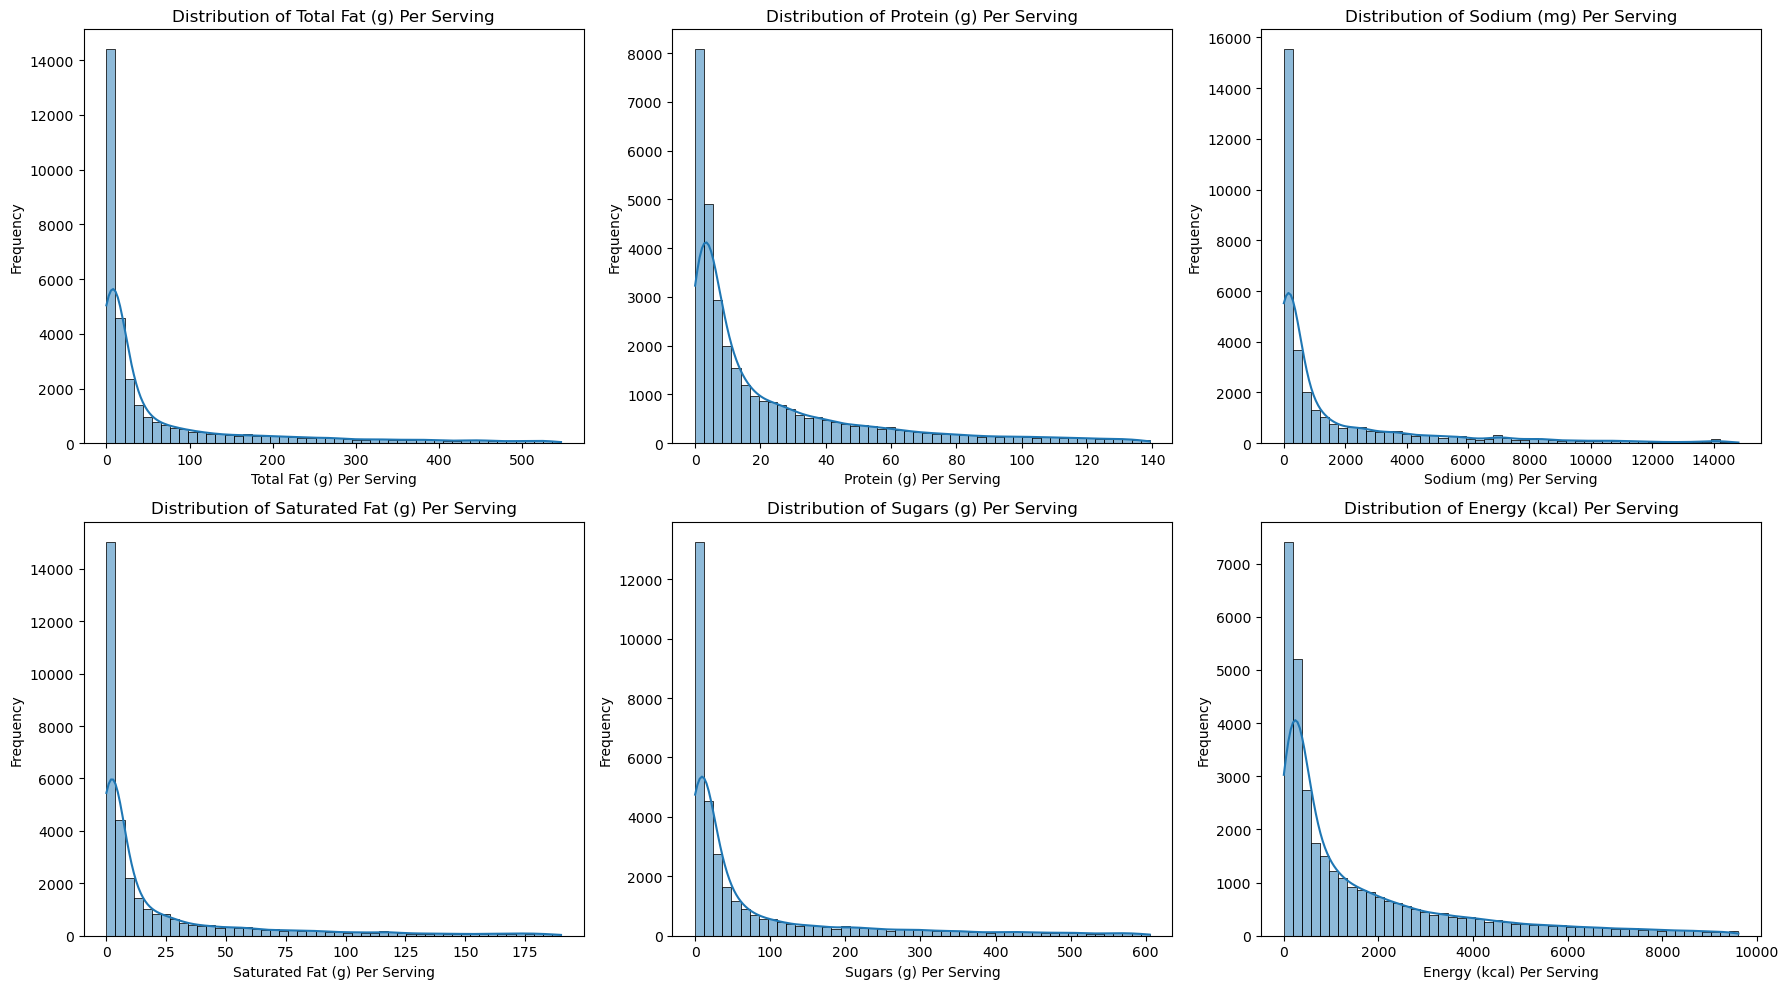

In [94]:
# Plot distribution of nutrients per serving
descriptions = {
    "total_fat_per_serving": "Total Fat (g)",
    "total_pro_per_serving": "Protein (g)",
    "total_sod_per_serving": "Sodium (mg)",
    "total_sat_per_serving": "Saturated Fat (g)",
    "total_sug_per_serving": "Sugars (g)",
    "total_nrg_per_serving": "Energy (kcal)"
}
cols = list(descriptions.keys())
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(cols):
    filtered_data = df_with_yields[df_with_yields[col] < df_with_yields[col].quantile(0.90)]
    sns.histplot(filtered_data[col], bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {descriptions[col]} Per Serving')
    axes[i].set_xlabel(descriptions[col] + " Per Serving")
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [84]:
def ingredients_summary_norm(recipe):
    """Summarize the ingredients in a recipe"""
    ingredients = [" ".join((a['text'].split(", "))[::-1]) for a in recipe["ingredients"]]
    quantities = [a['text'] for a in recipe["quantity"]]
    units = [a['text'] for a in recipe["unit"]]
    units = [a if is_number(b) <= 1 else a + "s" for a, b in zip(units, quantities)]
    weights = recipe["weight_per_ingr"]
    nutrients = recipe["nutr_per_ingredient"]

    total_nutrition = {}

    summary = f"Recipe: {recipe['title']}\n"
    
    # Create a summary string
    summary += "\nIngredients:\n"
    for ingr, qty, unit, weight, nutr in zip(ingredients, quantities, units, weights, nutrients):
        summary += "\t-{} {} of {}\n".format(qty, unit, ingr)
        # summary += "\t-{} {} ({} g) of {}\n".format(qty, unit, weight, ingr)

        # Sum the nutritional info (Should be the same fields for every entry)
        for key, value in nutr.items():
            if key not in total_nutrition:
                total_nutrition[key] = 0
            total_nutrition[key] += value

    summary += "\nInstructions (Makes {} servings):\n".format(recipe["servings_max"] if recipe["servings_min"] == recipe["servings_max"] else "{}-{}".format(recipe["servings_max"], recipe["servings_max"]))
    instructions = [step['text'] for step in recipe["instructions"]]
    for i, step in enumerate(instructions):
        summary += "\t{}. {}\n".format(i+1, step)
    
    summary += "\nTotal nutritional information per serving for the recipe:\n"
    descriptions = {
        "total_fat_per_serving": "Total Fat (g)",
        "total_pro_per_serving": "Protein (g)",
        "total_sod_per_serving": "Sodium (mg)",
        "total_sat_per_serving": "Saturated Fat (g)",
        "total_sug_per_serving": "Sugars (g)",
        "total_nrg_per_serving": "Energy (kcal)"
    }
    for key, desc in descriptions.items():
        if key in recipe:
            value = recipe[key]
            summary += "- {}: {:.2f}\n".format(desc, value)


    return summary

In [95]:
# save df_with_yields to a json file
df_with_yields.to_json("../../datasets/recipes_with_servings_and_normalized_nutrients.json", orient="records", lines=True)

In [92]:
a = df_with_yields[df_with_yields["total_nrg_per_serving"] > 1000].iloc[982]
a

fsa_lights_per100g       {'fat': 'orange', 'salt': 'green', 'saturates'...
id                                                              0de95abeb3
ingredients              [{'text': 'wheat flour, white, all-purpose, un...
instructions             [{'text': 'Add all ingredients to your cake mi...
nutr_per_ingredient      [{'fat': 1.23, 'nrg': 455.0, 'pro': 12.91, 'sa...
nutr_values_per100g      {'energy': 328.9554265629992, 'fat': 17.262421...
partition                                                            train
quantity                 [{'text': '1'}, {'text': '34'}, {'text': '1'},...
title                                                  Cake Mix Extender I
unit                     [{'text': 'cup'}, {'text': 'cup'}, {'text': 't...
url                      http://www.food.com/recipe/cake-mix-extender-i...
weight_per_ingr          [125.0, 6854.400000000001, 4.6, 2592.0, 5446.4...
total_fat                                                          2593.23
total_nrg                

In [93]:
print(ingredients_summary_norm(a))

Recipe: Cake Mix Extender I

Ingredients:
	-1 cup of unenriched all-purpose white wheat flour
	-34 cups of granulated sugars
	-1 teaspoon of sodium aluminum sulfate double-acting baking powder leavening agents
	-12 cups of salad or cooking olive oil
	-23 cups of generic bottled water

Instructions (Makes 12.0 servings):
	1. Add all ingredients to your cake mix ingredients and prepare as indicated on the box.
	2. Cakes may need a few extra minutes of baking time because there is more batter than the original cake mix.

Total nutritional information per serving for the recipe:
- Total Fat (g): 216.10
- Protein (g): 1.08
- Sodium (mg): 56.17
- Saturated Fat (g): 29.84
- Sugars (g): 569.87
- Energy (kcal): 4118.08



In [93]:
# Categorize all recipes by breakfast, lunch, dinner, snack
# This is a very naive approach, but it works for now
def categorize_recipe(title):
    title = title.lower()
    title_singular = title.rstrip('s')  # naive singularization
    title = title + " " + title_singular  # combine both forms for checking
    
    if any(word in title for word in ["breakfast", "pancake", "omelet", "smoothie", "cereal", "waffle", "toast", "muffin", "bacon", "sausage", "egg", "yogurt"]):
        return "breakfast"
    elif any(word in title for word in ["lunch", "sandwich", "salad", "wrap", "soup", "burger", "taco", "burrito", "pizza"]):
        return "lunch"
    elif any(word in title for word in ["dinner", "steak", "pasta", "curry", "stew", "roast", "chicken", "fish", "vegetarian", "vegan", "rice", "noodle", "carrot"]):
        return "dinner"
    elif any(word in title for word in ["snack", "cookie", "brownie", "cake", "pie", "bar", "muffin", "cupcake", "dessert", "pudding", "ice cream"]):
        return "snack"
    else:
        return "other"


In [94]:

# Loop through all recipes and categorize them
df['category'] = df['title'].apply(categorize_recipe)
df['category'].value_counts()


category
other        33523
snack         5784
dinner        5054
lunch         3483
breakfast     3391
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Recipes by Category')

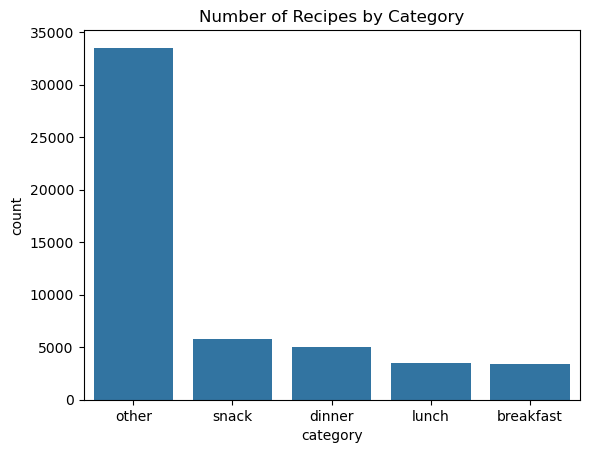

In [95]:
# Show a bar chart of the categoriesplt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Number of Recipes by Category')

In [96]:
# Find the top used words in recipe titles
from collections import Counter
import re
all_titles = " ".join(df['title'].tolist()).lower()
words = re.findall(r'\b\w+\b', all_titles)
word_counts = Counter(words)
common_words = word_counts.most_common(100)
common_words


[('and', 3714),
 ('recipe', 3337),
 ('bread', 3260),
 ('sauce', 3161),
 ('chocolate', 3100),
 ('s', 2898),
 ('with', 2673),
 ('butter', 2352),
 ('salad', 1864),
 ('cream', 1854),
 ('chicken', 1710),
 ('cheese', 1594),
 ('peanut', 1421),
 ('easy', 1413),
 ('cookies', 1398),
 ('dressing', 1378),
 ('honey', 1284),
 ('for', 1215),
 ('sweet', 1189),
 ('rice', 1182),
 ('apple', 1175),
 ('homemade', 1083),
 ('mix', 1079),
 ('dip', 1015),
 ('pie', 940),
 ('strawberry', 930),
 ('biscuits', 917),
 ('bars', 858),
 ('orange', 834),
 ('potatoes', 800),
 ('oatmeal', 793),
 ('hot', 768),
 ('cranberry', 756),
 ('potato', 751),
 ('roasted', 712),
 ('cake', 708),
 ('cinnamon', 686),
 ('granola', 679),
 ('blueberry', 678),
 ('mustard', 668),
 ('white', 668),
 ('free', 663),
 ('caramel', 663),
 ('wheat', 660),
 ('sugar', 638),
 ('fudge', 638),
 ('almond', 636),
 ('soup', 634),
 ('ice', 627),
 ('in', 623),
 ('creamy', 621),
 ('no', 618),
 ('a', 613),
 ('ginger', 605),
 ('pumpkin', 596),
 ('crust', 592),
 (

## Layer 1 Recipes

In [97]:
# Read in json file
df = pd.read_json('../../datasets/recipe1M_layers/layer1.json')
df.head()

,ingredients,url,partition,title,id,instructions
0,"[{'text': '6 ounces penne'}, {'text': '2 cups ...",http://www.epicurious.com/recipes/food/views/-...,train,Worlds Best Mac and Cheese,000018c8a5,[{'text': 'Preheat the oven to 350 F. Butter o...
1,"[{'text': '1 c. elbow macaroni'}, {'text': '1 ...",http://cookeatshare.com/recipes/dilly-macaroni...,train,Dilly Macaroni Salad Recipe,000033e39b,[{'text': 'Cook macaroni according to package ...
2,"[{'text': '8 tomatoes, quartered'}, {'text': '...",http://www.foodnetwork.com/recipes/gazpacho1.html,train,Gazpacho,000035f7ed,[{'text': 'Add the tomatoes to a food processo...
3,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",http://www.food.com/recipe/crunchy-onion-potat...,test,Crunchy Onion Potato Bake,00003a70b1,[{'text': 'Preheat oven to 350 degrees Fahrenh...
4,[{'text': '1 (3 ounce) package watermelon gela...,http://www.food.com/recipe/cool-n-easy-creamy-...,train,Cool 'n Easy Creamy Watermelon Pie,00004320bb,"[{'text': 'Dissolve Jello in boiling water.'},..."


In [99]:
# How many rows are there?
print("Dataset contains {} individual recipes (without de-duping)".format(len(df)))

Dataset contains 1029720 individual recipes (without de-duping)


In [100]:
# What columns are there?
list(df.columns)

['ingredients', 'url', 'partition', 'title', 'id', 'instructions']

In [101]:
# Let's look at an individual row
recipe = df.iloc[0]
recipe

ingredients     [{'text': '6 ounces penne'}, {'text': '2 cups ...
url             http://www.epicurious.com/recipes/food/views/-...
partition                                                   train
title                                  Worlds Best Mac and Cheese
id                                                     000018c8a5
instructions    [{'text': 'Preheat the oven to 350 F. Butter o...
Name: 0, dtype: object

In [102]:
recipe["title"]

'Worlds Best Mac and Cheese'

In [103]:
# Each element is a single ingredient with multiple discriptors
recipe["ingredients"]

[{'text': '6 ounces penne'},
 {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
 {'text': '1 ounce Cheddar, grated (1/4 cup)'},
 {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
 {'text': '1/4 cup (1/2 stick) unsalted butter'},
 {'text': '1/3 cup all-purpose flour'},
 {'text': '3 cups milk'},
 {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
 {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
 {'text': '1/2 teaspoon kosher salt'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
 {'text': '1/8 teaspoon garlic powder'},
 {'text': '(makes about 4 cups)'}]

In [104]:
recipe["instructions"]

[{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},
 {'text': 'Cook the penne 2 minutes less than package directions.'},
 {'text': '(It will finish cooking in the oven.)'},
 {'text': 'Rinse the pasta in cold water and set aside.'},
 {'text': 'Combine the cooked pasta and the sauce in a medium bowl and mix carefully but thoroughly.'},
 {'text': 'Scrape the pasta into the prepared baking dish.'},
 {'text': 'Sprinkle the top with the cheeses and then the chili powder.'},
 {'text': 'Bake, uncovered, for 20 minutes.'},
 {'text': 'Let the mac and cheese sit for 5 minutes before serving.'},
 {'text': 'Melt the butter in a heavy-bottomed saucepan over medium heat and whisk in the flour.'},
 {'text': 'Continue whisking and cooking for 2 minutes.'},
 {'text': 'Slowly add the milk, whisking constantly.'},
 {'text': 'Cook until the sauce thickens, about 10 minutes, stirring frequently.'},
 {'text': 'Remove from the heat.'},
 {'text': 'Add the cheeses, salt, chili powder, 

In [ ]:
def ingredients_summary(recipe):
    """Summarize the ingredients in a recipe"""
    ingredients = [" ".join((a['text'].split(", "))[::-1]) for a in recipe["ingredients"]]


    summary = f"Recipe: {recipe['title']}\n"
    
    # Create a summary string
    summary += "\nIngredients:\n"
    for ingr in ingredients:
        summary += "\t-{}\n".format(ingr)

    summary += "\nInstructions:\n"
    instructions = [step['text'] for step in recipe["instructions"]]
    for i, step in enumerate(instructions):
        summary += "\t{}. {}\n".format(i+1, step)
    
    return summary

In [106]:
recipe = df.iloc[10278]
print(ingredients_summary(recipe))

Recipe: Sausage-Stuffed Zucchini

Ingredients:
	-halved lengthwise 4 md. zucchini
	-1/2 lb. bulk mild Italian sausage
	-1/4 cup chopped onion
	-minced 1 clove garlic
	-1 tsp. dried oregano
	-1/2 cup fresh corn kernels
	-frozen corn
	-seeded and diced 1 md. tomato
	-divided 1 cup shredded cheddar cheese

Instructions:
	1. Place zucchinis, cut side down, in a large skillet; add 1/2-inch of water.
	2. Bring to a boil; reduce heat and simmer until zucchini are crisp tender, about 5 minutes.
	3. Remove zucchini and drain water.
	4. In the same skillet, cook sausage, onion and garlic until sausage is browned; drain fat.
	5. Add oregano, corn and tomato.
	6. Cook and stir until heated through.
	7. Remove from heat and stir in 2/3 cup cheese; set aside.
	8. Scoop out and discard seeds from zucchini.
	9. Divide the sausage mixture among zucchini shells.
	10. Place in a greased 13x9x2-inch baking pan.
	11. Sprinkle with remaining cheese.
	12. Bake uncovered, at 375F for 12-15 minutes or until he